Performing Facial Recognition with Deep Learning
 
Objective: Create a facial recognition tool using a relevant deep learning algorithm, leveraging the provided resources.
 
Context: You are working for Face2Gene, an American AI company that has developed a healthcare app for doctors. The app utilizes deep learning algorithms to aid in diagnosing patients for genetic disorders and their variants. It converts patient photos into de-identified mathematical facial descriptors, which are then compared to syndrome-specific computational-based classifiers to determine similarity. The app provides a prioritized list of syndromes with similar morphology and suggests phenotypic traits and genes for feature annotation and syndrome prioritization.
 
Management has given priority to empowering and entrusting the in-house AI team. As a new member of the team, your task is to build a baseline model for facial recognition. The goal is to further enhance the app's existing features and add more value to the business based on this baseline model.
 
Dataset Details: The ORL Database of Faces consists of 400 images from 40 different subjects. The images were captured at different times, under varying lighting conditions, with different facial expressions (open, closed eyes, smiling, not smiling), and with or without glasses. All the images have a dark homogeneous background, and the subjects are positioned upright and frontal with some tolerance for side movement. Each image has a size of 92x112 pixels and 256 grey levels per pixel.
 
Data can be downloaded from the following link:
https://www.kaggle.com/datasets/kasikrit/att-database-of-faces
 


In [147]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from PIL import Image 
import os
import glob

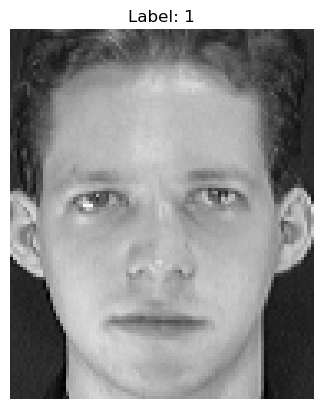

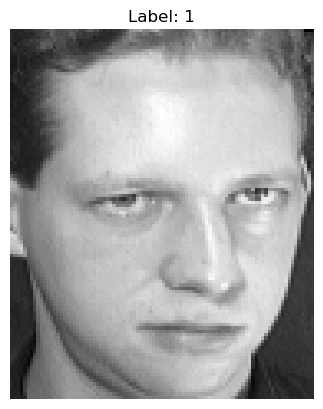

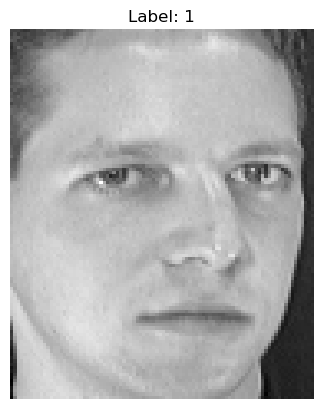

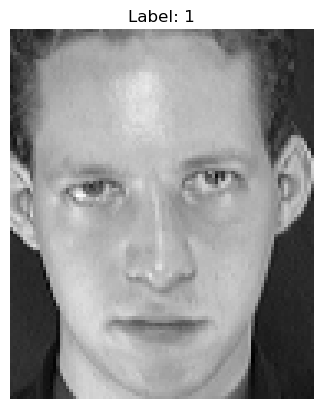

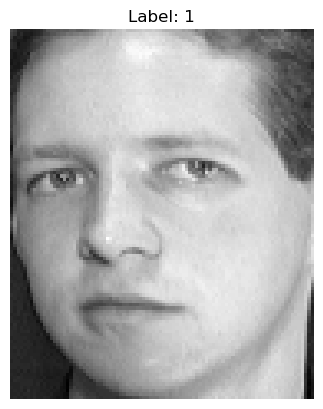

In [365]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from PIL import Image 
import os
import glob

# --- Data Loading and Preparation ---
data_dir = r'D:\OneDrive\Knowledge Center\AI - ML\Masters in Artifical Engineer\Advanced Deep Learning and Computer Vision\ORL_Faces'  # Path to your extracted ORL Faces dataset

# Collect image paths
image_paths = glob.glob(os.path.join(data_dir, '**/*.pgm')) 

# Create empty lists for images and labels
images = []
labels = []

# Load the images and extract labels
for image_path in image_paths:
    label = int(os.path.split(os.path.dirname(image_path))[-1][1:])  # Extract label from folder name
    image = np.array(Image.open(image_path).convert('L'))          # Convert to grayscale
    #image = np.array(Image.open(image_path).convert('L').transpose(Image.TRANSPOSE)) 

    images.append(image)
    labels.append(label)


# --- Data Visualization ---
def display_image(image, label):
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

# Display a few sample images
for i in range(5): 
    display_image(images[i], labels[i])

In [367]:
from sklearn.model_selection import train_test_split
# Convert image and label lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Initial split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42) 

# Further split: 70% of original training for training, 30% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


In [369]:
labels

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,  3,
        3,  3,  3,  3,  3

In [371]:
# Reshape the images to add a channel dimension
X_train = X_train.reshape(X_train.shape[0], 92, 112, 1) 
X_val = X_val.reshape(X_val.shape[0], 92, 112, 1) 
X_test = X_test.reshape(X_test.shape[0], 92, 112, 1) 

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
from tensorflow.keras.utils import to_categorical 
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [373]:
y_train = y_train[:, :40]
y_test = y_test[:, :40]

In [218]:
from tensorflow.keras.optimizers import Nadam 
learning_rate = 0.0005
model.compile(loss='categorical_crossentropy', optimizer=Nadam(learning_rate=learning_rate), metrics=['accuracy'])# Train the model for 10 epochs with a batch size of 32 and validation data
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

Epoch 1/10
4/4 [==============================] - 11s 2s/step - loss: 5.0495 - accuracy: 0.6250 - val_loss: 0.8026 - val_accuracy: 0.8229
Epoch 2/10
4/4 [==============================] - 9s 2s/step - loss: 4.3931 - accuracy: 0.6875 - val_loss: 0.7376 - val_accuracy: 0.8333
Epoch 3/10
4/4 [==============================] - 9s 2s/step - loss: 4.0331 - accuracy: 0.7098 - val_loss: 0.7181 - val_accuracy: 0.8646
Epoch 4/10
4/4 [==============================] - 9s 2s/step - loss: 4.9663 - accuracy: 0.6518 - val_loss: 0.7318 - val_accuracy: 0.8333
Epoch 5/10
4/4 [==============================] - 9s 2s/step - loss: 4.0301 - accuracy: 0.7098 - val_loss: 0.7701 - val_accuracy: 0.8125
Epoch 6/10
4/4 [==============================] - 9s 2s/step - loss: 4.6776 - accuracy: 0.6696 - val_loss: 0.8025 - val_accuracy: 0.8229
Epoch 7/10
4/4 [==============================] - 9s 2s/step - loss: 4.2457 - accuracy: 0.6964 - val_loss: 0.8271 - val_accuracy: 0.8229
Epoch 8/10
4/4 [========================

In [221]:
from tensorflow.keras.optimizers import Adamax 
learning_rate = 0.00005
model.compile(loss='categorical_crossentropy', optimizer=Adamax(learning_rate=learning_rate), metrics=['accuracy'])# Evaluate the model on the test data
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

Epoch 1/10
4/4 [==============================] - 10s 2s/step - loss: 4.3894 - accuracy: 0.6875 - val_loss: 0.8386 - val_accuracy: 0.8333
Epoch 2/10
4/4 [==============================] - 7s 2s/step - loss: 5.1089 - accuracy: 0.6429 - val_loss: 0.8357 - val_accuracy: 0.8333
Epoch 3/10
4/4 [==============================] - 8s 2s/step - loss: 4.3174 - accuracy: 0.6920 - val_loss: 0.8385 - val_accuracy: 0.8333
Epoch 4/10
4/4 [==============================] - 9s 2s/step - loss: 4.8211 - accuracy: 0.6607 - val_loss: 0.8406 - val_accuracy: 0.8333
Epoch 5/10
4/4 [==============================] - 9s 2s/step - loss: 3.8856 - accuracy: 0.7188 - val_loss: 0.8409 - val_accuracy: 0.8333
Epoch 6/10
4/4 [==============================] - 10s 2s/step - loss: 4.1015 - accuracy: 0.7054 - val_loss: 0.8399 - val_accuracy: 0.8333
Epoch 7/10
4/4 [==============================] - 10s 3s/step - loss: 5.1089 - accuracy: 0.6429 - val_loss: 0.8396 - val_accuracy: 0.8333
Epoch 8/10
4/4 [======================

In [217]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
# Train the model for 10 epochs with a batch size of 32 and validation data
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val))
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

Epoch 1/10
14/14 [==============================] - 11s 732ms/step - loss: 7.2278 - accuracy: 0.0268 - val_loss: 3.7569 - val_accuracy: 0.0312
Epoch 2/10
14/14 [==============================] - 10s 691ms/step - loss: 7.0449 - accuracy: 0.0804 - val_loss: 3.5614 - val_accuracy: 0.0938
Epoch 3/10
14/14 [==============================] - 11s 760ms/step - loss: 6.3460 - accuracy: 0.1786 - val_loss: 3.3391 - val_accuracy: 0.1458
Epoch 4/10
14/14 [==============================] - 10s 696ms/step - loss: 5.3520 - accuracy: 0.3705 - val_loss: 2.3381 - val_accuracy: 0.3750
Epoch 5/10
14/14 [==============================] - 10s 753ms/step - loss: 4.4576 - accuracy: 0.5848 - val_loss: 1.8074 - val_accuracy: 0.5833
Epoch 6/10
14/14 [==============================] - 10s 758ms/step - loss: 4.7375 - accuracy: 0.6116 - val_loss: 1.8918 - val_accuracy: 0.6250
Epoch 7/10
14/14 [==============================] - 10s 747ms/step - loss: 5.4991 - accuracy: 0.5982 - val_loss: 1.6508 - val_accuracy: 0.7083

In [375]:
print(X_train.shape, X_val.shape, X_test.shape)

(224, 92, 112, 1) (96, 92, 112, 1) (80, 92, 112, 1)


In [377]:
import numpy as np

def convert_grayscale_to_rgb(X):
    return np.stack((X[..., 0],)*3, axis=-1)

# Apply the conversion to your datasets
X_train = convert_grayscale_to_rgb(X_train)
X_val = convert_grayscale_to_rgb(X_val)
X_test = convert_grayscale_to_rgb(X_test)
print(X_train.shape, X_val.shape, X_test.shape)

(224, 92, 112, 3) (96, 92, 112, 3) (80, 92, 112, 3)


In [391]:
from keras.applications.vgg16 import VGG16
from keras.models import Model 
from keras.layers import Dense, Flatten

# Load VGG16 model with ImageNet weights, exclude the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(92, 112, 3)) 

# Freeze some of the initial layers (optional)
for layer in base_model.layers[:10]:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = Flatten()(x) 
predictions = Dense(40, activation='softmax')(x) # 40 classes

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Nadam(learning_rate=0.0001), metrics=['accuracy']) 

# Train (consider using a lower learning rate for fine-tuning)
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")


Epoch 1/20
4/4 [==============================] - 20s 4s/step - loss: 3.7501 - accuracy: 0.0312 - val_loss: 3.8524 - val_accuracy: 0.0312
Epoch 2/20
4/4 [==============================] - 17s 4s/step - loss: 3.3696 - accuracy: 0.1027 - val_loss: 3.4854 - val_accuracy: 0.0833
Epoch 3/20
4/4 [==============================] - 16s 4s/step - loss: 2.9254 - accuracy: 0.1920 - val_loss: 3.2122 - val_accuracy: 0.1667
Epoch 4/20
4/4 [==============================] - 17s 4s/step - loss: 2.4829 - accuracy: 0.2768 - val_loss: 2.6631 - val_accuracy: 0.2708
Epoch 5/20
4/4 [==============================] - 17s 4s/step - loss: 1.6908 - accuracy: 0.5134 - val_loss: 1.8458 - val_accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 18s 4s/step - loss: 1.0158 - accuracy: 0.7054 - val_loss: 1.2996 - val_accuracy: 0.5938
Epoch 7/20
4/4 [==============================] - 18s 4s/step - loss: 0.6361 - accuracy: 0.7902 - val_loss: 1.1726 - val_accuracy: 0.6875
Epoch 8/20
4/4 [==================

In [405]:
from keras.applications.vgg16 import VGG16
from keras.models import Model 
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=2, min_lr=0.00001, 
                              verbose=1, mode='max')  # Reduce LR when accuracy plateaus

# Load VGG16 model with ImageNet weights, exclude the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(92, 112, 3)) 

# Freeze some of the initial layers (optional)
for layer in base_model.layers[:10]:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = Flatten()(x) 
predictions = Dense(40, activation='softmax')(x) # 40 classes

model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Nadam(learning_rate=0.0001), metrics=['accuracy']) 

# Train (consider using a lower learning rate for fine-tuning)
model.fit(X_train, y_train, epochs=20, batch_size=32,  callbacks=[early_stopping, reduce_lr], validation_data=(X_val, y_val))
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")


Epoch 1/20
7/7 [==============================] - 21s 3s/step - loss: 3.6147 - accuracy: 0.0179 - val_loss: 3.5756 - val_accuracy: 0.0521 - lr: 1.0000e-04
Epoch 2/20
7/7 [==============================] - 19s 3s/step - loss: 3.0756 - accuracy: 0.1652 - val_loss: 2.9289 - val_accuracy: 0.3333 - lr: 1.0000e-04
Epoch 3/20
7/7 [==============================] - 19s 3s/step - loss: 2.3803 - accuracy: 0.3616 - val_loss: 2.2051 - val_accuracy: 0.3229 - lr: 1.0000e-04
Epoch 4/20
7/7 [==============================] - 20s 3s/step - loss: 1.2599 - accuracy: 0.6071 - val_loss: 1.2007 - val_accuracy: 0.6458 - lr: 1.0000e-04
Epoch 5/20
3/3 [==============================] - 3s 831ms/step - loss: 1.4630 - accuracy: 0.5875
Test loss: 1.4629908800125122
Test accuracy: 0.5874999761581421


In [404]:
from keras.applications.vgg16 import VGG16
from keras.models import Model 
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=2, min_lr=0.00001, 
                              verbose=1, mode='max')  # Reduce LR when accuracy plateaus

checkpoint_path = "vgg16_orl_faces-{epoch:02d}-{val_accuracy:.2f}.hdf5"  # Filename format

checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             monitor='val_accuracy', 
                             mode='max',  # Monitor for maximizing validation accuracy
                             save_best_only=True,  # Save only the best performing model 
                             verbose=1) 


# Load VGG16 model with ImageNet weights, exclude the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(92, 112, 3)) 

# Freeze some of the initial layers (optional)
for layer in base_model.layers[:10]:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = Flatten()(x) 
predictions = Dense(40, activation='softmax')(x) # 40 classes

model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Nadam(learning_rate=0.0001), metrics=['accuracy']) 

# Train (consider using a lower learning rate for fine-tuning)
model.fit(X_train, y_train, epochs=20, batch_size=32,  callbacks=[reduce_lr, checkpoint], validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")


Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 3.6966 - accuracy: 0.0312
Epoch 1: val_accuracy improved from -inf to 0.02083, saving model to vgg16_orl_faces-01-0.02.hdf5


C:\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 19s 2s/step - loss: 3.6966 - accuracy: 0.0312 - val_loss: 3.6163 - val_accuracy: 0.0208 - lr: 1.0000e-04
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 3.2635 - accuracy: 0.1250
Epoch 2: val_accuracy improved from 0.02083 to 0.15625, saving model to vgg16_orl_faces-02-0.16.hdf5
7/7 [==============================] - 17s 3s/step - loss: 3.2635 - accuracy: 0.1250 - val_loss: 3.1611 - val_accuracy: 0.1562 - lr: 1.0000e-04
Epoch 3/20
7/7 [==============================] - ETA: 0s - loss: 2.4895 - accuracy: 0.3125
Epoch 3: val_accuracy improved from 0.15625 to 0.28125, saving model to vgg16_orl_faces-03-0.28.hdf5
7/7 [==============================] - 18s 3s/step - loss: 2.4895 - accuracy: 0.3125 - val_loss: 2.4571 - val_accuracy: 0.2812 - lr: 1.0000e-04
Epoch 4/20
7/7 [==============================] - ETA: 0s - loss: 1.5065 - accuracy: 0.5402
Epoch 4: val_accuracy improved from 0.28125 to 0.59375, saving model to vgg16_orl_faces-04

In [408]:
from keras.applications.vgg16 import VGG16
from keras.models import Model 
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=2, min_lr=0.00001, 
                              verbose=1, mode='max')  # Reduce LR when accuracy plateaus

checkpoint_path = "vgg16_orl_faces-{epoch:02d}-{val_accuracy:.2f}.hdf5"  # Filename format

checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             monitor='val_accuracy', 
                             mode='max',  # Monitor for maximizing validation accuracy
                             save_best_only=True,  # Save only the best performing model 
                             verbose=1) 


# Load VGG16 model with ImageNet weights, exclude the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(92, 112, 3)) 

# Freeze some of the initial layers (optional)
for layer in base_model.layers[:10]:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = Flatten()(x) 
predictions = Dense(40, activation='softmax')(x) # 40 classes

model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Nadam(learning_rate=0.0001), metrics=['accuracy']) 

# Train (consider using a lower learning rate for fine-tuning)
model.fit(X_train, y_train, epochs=20, batch_size=32,  callbacks=[early_stopping, reduce_lr, checkpoint], validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")


Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 3.6753 - accuracy: 0.0357
Epoch 1: val_accuracy improved from -inf to 0.15625, saving model to vgg16_orl_faces-01-0.16.hdf5
7/7 [==============================] - 18s 2s/step - loss: 3.6753 - accuracy: 0.0357 - val_loss: 3.5079 - val_accuracy: 0.1562 - lr: 1.0000e-04
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 3.1032 - accuracy: 0.1830
Epoch 2: val_accuracy did not improve from 0.15625
7/7 [==============================] - 17s 2s/step - loss: 3.1032 - accuracy: 0.1830 - val_loss: 3.0938 - val_accuracy: 0.1458 - lr: 1.0000e-04
Epoch 3/20
7/7 [==============================] - ETA: 0s - loss: 2.5148 - accuracy: 0.2991
Epoch 3: val_accuracy improved from 0.15625 to 0.40625, saving model to vgg16_orl_faces-03-0.41.hdf5
7/7 [==============================] - 18s 3s/step - loss: 2.5148 - accuracy: 0.2991 - val_loss: 2.2152 - val_accuracy: 0.4062 - lr: 1.0000e-04
Epoch 4/20
7/7 [==========================

In [454]:
from keras.applications.vgg16 import VGG16
from keras.models import Model 
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import Callback

class AccuracyThresholdCallback(Callback):
    def __init__(self, threshold=0.7, filepath=r"D:\OneDrive\Knowledge Center\AI - ML\Masters in Artifical Engineer\Advanced Deep Learning and Computer Vision\model_acc_{accuracy:.2f}.hdf5"):
        super().__init__()
        self.threshold = threshold
        self.filepath = filepath


    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') >= self.threshold:
            filename = self.filepath.format(accuracy=logs['val_accuracy'])
            self.model.save(filename)  # Change to save the entire model
            print(f"Validation accuracy exceeded threshold! Saving model to: {filename}")

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=2, min_lr=0.00001, 
                              verbose=1, mode='max')  # Reduce LR when accuracy plateaus
#checkpoint_path = "vgg16_orl_faces-{epoch:02d}-{val_accuracy:.2f}.hdf5"  # Filename format
checkpoint = AccuracyThresholdCallback(threshold=0.6)

# Load VGG16 model with ImageNet weights, exclude the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(92, 112, 3)) 

# Freeze some of the initial layers (optional)
for layer in base_model.layers[:10]:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = Flatten()(x) 
predictions = Dense(40, activation='softmax')(x) # 40 classes

model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Nadam(learning_rate=0.0001), metrics=['accuracy']) 

# Train (consider using a lower learning rate for fine-tuning)
model.fit(X_train, y_train, epochs=20, batch_size=32,  callbacks=[early_stopping, reduce_lr, checkpoint], validation_data=(X_val, y_val))

filepath=r"'D:\\OneDrive\\Knowledge Center\\AI - ML\\Masters in Artifical Engineer\\Advanced Deep Learning and Computer Vision\\model_acc_{accuracy:.2f}.hdf5'"


Epoch 1/20
7/7 [==============================] - 20s 3s/step - loss: 3.6293 - accuracy: 0.0312 - val_loss: 3.7265 - val_accuracy: 0.0208 - lr: 1.0000e-04
Epoch 2/20
7/7 [==============================] - 20s 3s/step - loss: 3.1913 - accuracy: 0.1741 - val_loss: 3.2496 - val_accuracy: 0.2188 - lr: 1.0000e-04
Epoch 3/20
7/7 [==============================] - 18s 3s/step - loss: 2.3403 - accuracy: 0.3795 - val_loss: 2.7203 - val_accuracy: 0.2083 - lr: 1.0000e-04
Epoch 4/20
7/7 [==============================] - 22s 3s/step - loss: 1.3451 - accuracy: 0.5982 - val_loss: 1.3435 - val_accuracy: 0.7188 - lr: 1.0000e-04
Epoch 5/20
7/7 [==============================] - 19s 3s/step - loss: 0.4843 - accuracy: 0.8527 - val_loss: 0.7590 - val_accuracy: 0.8229 - lr: 1.0000e-04
Epoch 6/20
7/7 [==============================] - 20s 3s/step - loss: 0.1441 - accuracy: 0.9420 - val_loss: 0.5877 - val_accuracy: 0.8438 - lr: 1.0000e-04
Epoch 7/20
7/7 [==============================] - 20s 3s/step - loss: 

In [414]:
import os
print(os.getcwd())  # Prints the current working directory

C:\Users\naseh


In [455]:
import os
from keras.models import load_model

saved_models_dir = 'D:\OneDrive\Knowledge Center\AI - ML\Masters in Artifical Engineer\Advanced Deep Learning and Computer Vision'  
model_filenames = [f for f in os.listdir(saved_models_dir) if f.endswith('.hdf5')]

for model_filename in model_filenames:
    model_path = os.path.join(saved_models_dir, model_filename)

model = load_model(model_path) 
print(f"Model: {model_filename} - Test Loss: {test_loss:.4f} - Test Accuracy: {test_accuracy:.4f}")

Model: model_acc_0.91.hdf5 - Test Loss: 0.5489 - Test Accuracy: 0.7875


In [456]:
from keras.applications.vgg16 import VGG16
from keras.models import Model 
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import Callback

class AccuracyThresholdCallback(Callback):
    def __init__(self, threshold=0.9, filepath=r"D:\OneDrive\Knowledge Center\AI - ML\Masters in Artifical Engineer\Advanced Deep Learning and Computer Vision\model_acc_{accuracy:.2f}.hdf5"):
        super().__init__()
        self.threshold = threshold
        self.filepath = filepath


    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') > self.threshold:
            filename = self.filepath.format(accuracy=logs['val_accuracy'])
            self.model.save(filename)  # Change to save the entire model
            print(f"Validation accuracy exceeded threshold! Saving model to: {filename}")

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=2, min_lr=0.00001, 
                              verbose=1, mode='max')  # Reduce LR when accuracy plateaus
#checkpoint_path = "vgg16_orl_faces-{epoch:02d}-{val_accuracy:.2f}.hdf5"  # Filename format
checkpoint = AccuracyThresholdCallback(threshold=0.6)

# Load VGG16 model with ImageNet weights, exclude the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(92, 112, 3)) 

# Freeze some of the initial layers (optional)
for layer in base_model.layers[:10]:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = Flatten()(x) 
predictions = Dense(40, activation='softmax')(x) # 40 classes

model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Nadam(learning_rate=0.0001), metrics=['accuracy']) 

# Train (consider using a lower learning rate for fine-tuning)
model.fit(X_train, y_train, epochs=20, batch_size=32,  callbacks=[early_stopping, checkpoint], validation_data=(X_val, y_val))

filepath=r"'D:\\OneDrive\\Knowledge Center\\AI - ML\\Masters in Artifical Engineer\\Advanced Deep Learning and Computer Vision\\model_acc_{accuracy:.2f}.hdf5'"


Epoch 1/20
7/7 [==============================] - 25s 3s/step - loss: 3.6739 - accuracy: 0.0134 - val_loss: 3.6225 - val_accuracy: 0.0417
Epoch 2/20
7/7 [==============================] - 21s 3s/step - loss: 3.2160 - accuracy: 0.1429 - val_loss: 3.0034 - val_accuracy: 0.3646
Epoch 3/20
7/7 [==============================] - 20s 3s/step - loss: 2.3834 - accuracy: 0.3527 - val_loss: 2.6043 - val_accuracy: 0.3125
Epoch 4/20
7/7 [==============================] - 24s 4s/step - loss: 1.4896 - accuracy: 0.5938 - val_loss: 1.3733 - val_accuracy: 0.5938
Epoch 5/20
7/7 [==============================] - 24s 4s/step - loss: 0.6392 - accuracy: 0.7679 - val_loss: 0.7774 - val_accuracy: 0.7500
Epoch 6/20
7/7 [==============================] - 23s 3s/step - loss: 0.2434 - accuracy: 0.9062 - val_loss: 0.4966 - val_accuracy: 0.8438
Epoch 7/20
7/7 [==============================] - 22s 3s/step - loss: 0.0906 - accuracy: 0.9420 - val_loss: 0.3397 - val_accuracy: 0.8958
Epoch 8/20
7/7 [==================

In [460]:
import os
from keras.models import load_model

saved_models_dir = 'D:\OneDrive\Knowledge Center\AI - ML\Masters in Artifical Engineer\Advanced Deep Learning and Computer Vision'  
model_filenames = [f for f in os.listdir(saved_models_dir) if f.endswith('.hdf5')]

for model_filename in model_filenames:
    model_path = os.path.join(saved_models_dir, model_filename)

model = load_model(model_path) 
print(f"Model: {model_filename} - Test Loss: {test_loss:.4f} - Test Accuracy: {test_accuracy:.4f}")

Model: model_acc_0.91.hdf5 - Test Loss: 0.5489 - Test Accuracy: 0.7875


As we see using the above model we could get accuracy above 90%